# Analyzing GroupChat Data

## Objective

I used to work with some friends of mine from 2012-2016. We still hang out together, and keep in touch primarily thorugh an imessage group thread that was created back in 2014. The group text still remains very active today. 

I wanted to find a way to get the data, and conduct data analysis on it. 

My Objective was to:

1. Do exploritory data analytics, 
2. identify which person has changed the most overtime,
3. identify synonyms, and 
4. do sentiment analysis on the text with embedding layers

## About the Data

I was able to colaborate with one of my friends who owns a macbook, as all imessages are stored in a secret folder on the macbooks. After locating the database, he found all group chats where he and I are both in, exported it to a csv file, and sent it to me. 

The data goes back to November 2017. There are a total of 73K records, some texts, some emotes. **(fig.1)**

In [37]:
print('Shape of data:',df.shape)
print('Earliest Message:',df['ts'].min())
df.head(3)

Shape of data: (73328, 10)
Earliest Message: 2017-11-14 00:29:35.000000


,myid,guid,text,cache_has_attachments,Person,ts,f_guid,Emote,wordlength,ConvoId
0,0,96249AFF-DA2C-4DDB-A4D1-E4BF8B0B686E,I’m thinking of getting a VIP table at a club ...,0,Colleen Crooks,2017-11-14 00:29:35.000000,None,text,19.0,0
1,1,555A599F-7216-46FD-92FD-924D3DCB6A9E,Damn shawty,0,Ana Rege,2017-11-14 00:30:10.000000,None,text,2.0,0
2,2,4083A168-4CD1-4C70-8296-C90ED0509457,I’m not paying for it lol,0,Colleen Crooks,2017-11-14 00:30:37.000000,None,text,6.0,0


## Exploritory Data Analysis

Below is some EDA to get a bit of a better understanding of the data. **(fig.2)**

The Average number of words used in a text is around 7, and the majority of the messages are less than 10. This could make finding synonyms and doing sentiment analysis more difficult as a result of the texts being so short.

Average number of words used in a text: wordlength    7.064302
dtype: float64


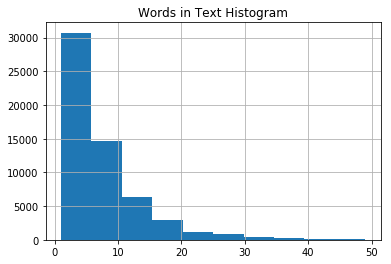

In [38]:
print('Average number of words used in a text:',Wordlength.mean())
plotWord.hist()
plt.title('Words in Text Histogram')
plt.show()

The majoirty of the data in here is text messages. There is a sizeable amount, though, of records that aren't actually texts, but Emotes to previous messages.

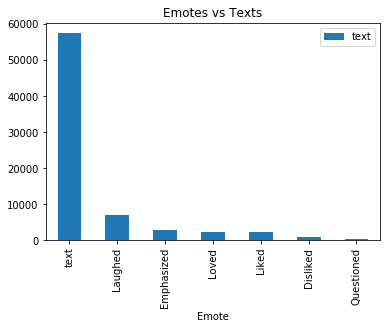

In [39]:
plotEmote.plot.bar()
plt.title('Emotes vs Texts')
plt.show()

The group chat is dominated by 4 individuals (PersonL, PersonE, PersonA, and PersonO).

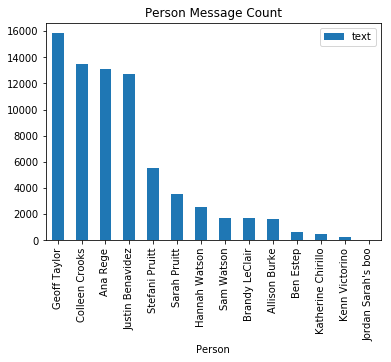

In [40]:
plotPerson.plot.bar()
plt.title('Person Message Count')
plt.show()

As the average text message is only 7 words, I wanted to do some analysis based on the conversations that take place.

I defined a conversation as any group of text messages that are less than 15 minutes from the previous message. If a message is sent, and the previous message was more than 15 minutes ago, than that is the start of a new conversation. The usefullness of this will be much more noticeable when finding word synonyms. **(fig.3)**

Below shows the total number converstaions We have had in the groupmessage, the average number of messages in a conversation, and the average length of time (in minutes) of a conversation.

In [41]:
print('Total number of conversations in the groupchat:',len(convo))
print('Average number of messages in a conversation:',convo['MessageCount'].mean())
print('Average time length of a conversation:',convo['ConvoMinLength'].mean())

Total number of conversations in the groupchat: 6167
Average number of messages in a conversation: 9.33322523106859
Average time length of a conversation: 61.54434895411059


Here are the first 5 records of the conversation table, showing some basic characteristics of each conversation:

In [42]:
convo.head()

,ConvoId,Startid,Endid,ConvoStarter,ConvoEnder,Min_ts,Max_ts,WordCount,AverageWordCount,MessageCount,ConvoMinLength
0,0,0,5,Colleen Crooks,Hannah Watson,2017-11-14 00:29:35,2017-11-14 00:31:21,28.0,7.0,4,1.0
1,1,6,11,Justin Benavidez,Geoff Taylor,2017-11-14 00:55:22,2017-11-14 00:57:40,24.0,6.0,4,2.0
2,2,12,12,Geoff Taylor,Geoff Taylor,2017-11-15 01:21:27,2017-11-15 01:21:27,9.0,9.0,1,0.0
3,3,13,24,Allison Burke,Ana Rege,2017-11-15 01:55:53,2017-11-15 02:19:00,40.0,4.0,10,23.0
4,4,25,25,Sam Watson,Sam Watson,2017-11-15 13:17:44,2017-11-15 13:17:44,1.0,1.0,1,0.0


Finally, it wouldn't be NLP if there wasn't a word cloud showing word counts. Below is a word cloud image, showing the top 500 words, after lowercasing, removing digits, and removing punctuation.

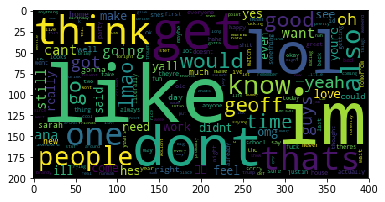

In [43]:
plt.imshow(wc)

## Who Has Changed the Most?

I wanted to see who in the chat has changed the most since November 2017. I decided to first break the text data up by time periods of 10 months. Anything before 8/31/2018 is assigned to be "Time Period 1". Anything from 9/1/2018 to 6/30/2019 is 
"Time Period 2." Everything else after 7/1/2019 is "Time Period 3". Below are the first 5 rows of the dataset that will be used for this section. **(fig.5)**

In [44]:
messages.tail()

,Person,text,ts,ConvoId,textclean,Time Period,Person/Period,labelencode,labelencode1,prediction
73323,Geoff Taylor,This is one of the worst-case senators with Tr...,2020-05-08 14:03:24.000000,6166,this is one of the worstcase senators with tr...,Part 3,Geoff Taylor Part 3,"[7, 5, 25, 3, 0, 16, 2, 0, 4, 0]","[7, 5, 25, 3, 0, 16, 2, 0, 4, 0, 0, 0, 0, 0, 0...",[[0.9354379]]
73324,Colleen Crooks,Our infrastructure is flawed to the point of i...,2020-05-08 14:03:27.000000,6166,our infrastructure is flawed to the point of ...,Part 3,Colleen Crooks Part 3,"[261, 5, 2931, 4, 0, 274, 3, 8, 21, 51]","[261, 5, 2931, 4, 0, 274, 3, 8, 21, 51, 0, 0, ...",[[0.372033]]
73325,Geoff Taylor,If Hillary won and the senate were flipped I’m...,2020-05-08 14:04:18.000000,6166,if hillary won and the senate were flipped im...,Part 3,Geoff Taylor Part 3,"[33, 1254, 2, 0, 64, 122, 238, 91, 55, 24, 435...","[33, 1254, 2, 0, 64, 122, 238, 91, 55, 24, 435...",[[0.9974395]]
73326,Geoff Taylor,Hillary and the Democrats are willing to take ...,2020-05-08 14:05:25.000000,6166,hillary and the democrats are willing to take...,Part 3,Geoff Taylor Part 3,"[2, 0, 23, 1868, 4, 201, 189, 2, 1889, 20, 0, ...","[2, 0, 23, 1868, 4, 201, 189, 2, 1889, 20, 0, ...",[[0.4587873]]
73327,Geoff Taylor,"It’s truly cartoonishly evil, to borrow a phra...",2020-05-08 14:05:47.000000,6166,its truly cartoonishly evil to borrow a phras...,Part 3,Geoff Taylor Part 3,"[26, 323, 578, 4, 1, 36, 4139]","[26, 323, 578, 4, 1, 36, 4139, 0, 0, 0, 0, 0, ...",[[0.99997663]]


From here, I grouped together all of the text messages for each Time Period/Person, and put it in a Term Document Matrix.

To do this, I first needed to the most frequent words. Below shows a function that puts all of the texts together into one big string (FULLCORP). From there, another function retrieves the top 3000 words that appear in the FULLCORP. I display the top 14 words afterwards.

In [45]:
x = list(messages[['textclean']].values.T)[0]

#full corpus
FULLCORP=get_corp(x,' ')

#getting word frequencies
BOWp=get_bow(FULLCORP,3000)

#displaying top 14 words
BOWp[:14]

['i',
 'the',
 'a',
 'to',
 'and',
 'is',
 'you',
 'it',
 'that',
 'of',
 'in',
 'for',
 'like',
 'im']

From there, I create a Bag of words matrix, a matrix representation of the text data. Each row will be a person/timeframe. Each column will be one of the 3,000 words (there will be 3,000 columns!). Each value in the cells corresponds to the number of instances that word appeared in that person/timeframe.

In [46]:
TDMatrix=bagofwords(data,BOWp)
print('Shape of my Bag of Words Matrix:',TDMatrix.shape)

Shape of my Bag of Words Matrix: (36, 3000)


In [47]:
TDMatrixdisplay.head()

,i,the,a,to,and,is,you,it,that,of,...,jessica,presidents,clients,properly,allowing,male,understood,smoking,profit,sports
Colleen Crooks Part 1,399,225,268,176,204,145,104,129,107,93,...,0,0,1,0,1,1,1,0,5,1
Ana Rege Part 1,279,343,272,217,208,157,199,135,74,96,...,0,0,0,0,0,0,0,0,1,0
Justin Benavidez Part 1,376,495,334,316,213,212,242,215,257,188,...,2,0,0,2,0,0,0,0,0,1
Geoff Taylor Part 1,525,370,346,400,363,194,234,154,197,176,...,1,2,0,0,1,0,1,1,0,2
Allison Burke Part 1,61,37,30,43,54,20,17,14,4,9,...,0,0,0,0,0,1,0,0,0,0


For example, PersonE in Part1 says "i" 399 times. Because 3,000 is a lot of columns, I perform SVD to reduce the dimensionality of the dataset to 36 columns.

In [48]:
print('Shape of my Bag of Words Matrix after svd:',mysvd.shape)

Shape of my Bag of Words Matrix after svd: (36, 36)


Because each row represents the words said by each person for each time period, we can measure if an individual has changed over time by measuring the distance from row to row.

The measuring technique I used is **Cosine Distance**. This measures the angles between two vectors, as opposed to the distance appart they are. This is useful for NLP tasks, as documents can vary in size. We wouldn't want to classify two documents as being different just soly based on their size; the content and words in there matter too! 

Below is a summary of my analysis, comparing each person to the different time periods (Chapters) of our group text.

In [49]:
cosinepersondisplay

Cosine Distance                                            \
Compare     Capter 1 to 1 Capter 1 to 2 Capter 1 to 3 Capter 2 to 2   
Person                                                                
Allison               1.0      0.861812      0.901859           1.0   
Ana                   1.0      0.968174      0.983412           1.0   
Ben                   1.0      0.885421      0.898270           1.0   
Brandy                1.0      0.931692      0.950962           1.0   
Colleen               1.0      0.980178      0.985130           1.0   
Geoff                 1.0      0.983507      0.989674           1.0   
Hannah                1.0      0.954204      0.965023           1.0   
Justin                1.0      0.977513      0.986624           1.0   
Katherine             1.0      0.604456      0.686940           1.0   
Sam                   1.0      0.855756      0.879479           1.0   
Sarah                 1.0      0.903394      0.944830           1.0   

                                       
Compare   Capter 2 to 3 Capter 3 to 3  
Person                                 
Allison        0.928979           1.0  
Ana            0.978490           1.0  
Ben            0.876414           1.0  
Brandy         0.952157           1.0  
Colleen        0.984945           1.0  
Geoff          0.986160           1.0  
Hannah         0.953378           1.0  
Justin         0.983576           1.0  
Katherine      0.735495           1.0  
Sam            0.932891           1.0  
Sarah          0.951116           1.0

#### Findings

The row vectors associated with the Same Person and Chapter are all equal to 1. This makes sense, as the angle of two identical vectors will be the same.

Overall, though, there isn't anything too interesting/ground breaking with this analysis. Everyone pretty much remains the same through each time period. The only person that has consistently changed was **PersonI**; they have the lowest Cosine distances between each Chapter. However, if you go above to the previous section, you'll see that PersonI has also sent the third least amount of messages out of everyone. This will make the person's data directionality much more volatile than the others.


## What Words are the Most Similar?

Next, I wanted ot find what words were most similar to each other based on context in our conversations.


I will be taking a similar approach for this section as the one prior. Instead of making a bag-of-words matrix around People/Time periods, though, I will be making a TD matrix around the 6,000 or so conversations. Additionally, instead of having the columns be the vocab words, the rows will be the vocab words.

From there, I wll measure the distances between each word, and create a function that will display the most similar words to an inputted word. Below is the shape, as well as the first 5 records of this new TD matrix.

Again, each column is a conversation that took place, each row is a vocab word, and the values represent counts

In [50]:
print('Shape of TD matrix:',convobow.shape)
convobow.head()

Shape of TD matrix: (3000, 6167)


,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
like,0,0,0,0,0,0,0,1,1,0,...,7,7,0,0,3,0,3,0,11,6
im,2,0,1,0,0,0,0,3,0,1,...,1,5,0,0,1,0,3,0,6,5
lol,1,0,0,0,0,0,0,1,0,0,...,2,2,0,0,0,0,0,0,4,2
dont,0,0,0,0,0,0,0,0,1,0,...,1,5,0,0,3,0,1,0,5,5
get,0,0,0,0,0,0,0,0,0,1,...,3,4,0,0,1,0,4,0,3,2


SVD again is performed on this matrix, keeping the first 100 principal components (PC). Below is a graph of the exaplained variance of the PC. Most of this data's variability is explained in the first PC.

Text(0.5,1,'Explained Variance of first 100 PCs')

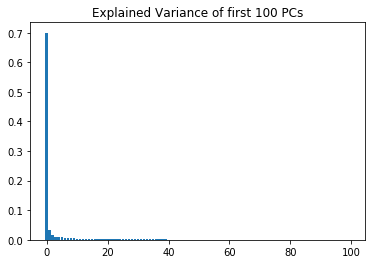

In [51]:
plt.bar(range(100),svd2.explained_variance_ratio_)
plt.title('Explained Variance of first 100 PCs')

All thats left to do here is to do cosine similarity of each row to eachother. I created a function that shows the most similar words to a given word using cosine distance. Below are some of my favorites!

For the Game of Thrones people! We talk about them quite a bit in the group text.

In [52]:
word='throne'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,arya,0.941140
1,Second Most Similar,jon,0.920736
2,Third Most Similar,cersei,0.890753
3,Forth Most Similar,battle,0.847644
4,Fifth Most Similar,dragon,0.847189
5,Sixth Most Similar,king,0.829628


In [53]:
word='sansa'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,tyrion,0.854046
1,Second Most Similar,jon,0.846986
2,Third Most Similar,cersei,0.842689
3,Forth Most Similar,jaime,0.828276
4,Fifth Most Similar,kills,0.814526
5,Sixth Most Similar,character,0.809274


Do you remember the yanny/Laruel thing? if not, look it up!

In [54]:
word='yanny'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,laurel,0.997188
1,Second Most Similar,hear,0.741061
2,Third Most Similar,l,0.498054
3,Forth Most Similar,cmon,0.428033
4,Fifth Most Similar,word,0.425605
5,Sixth Most Similar,theory,0.338758


We also **love** tacobell

In [55]:
word='tbell'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,chalupa,0.883058
1,Second Most Similar,crunchwrap,0.570667
2,Third Most Similar,taco,0.531691
3,Forth Most Similar,tjs,0.518273
4,Fifth Most Similar,meeting,0.425751
5,Sixth Most Similar,snapchat,0.386564


**t-pain's voice** I'm gonna buy you a drannnnkkk

In [56]:
word='drink'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,drinking,0.635505
1,Second Most Similar,drunk,0.617228
2,Third Most Similar,wine,0.614480
3,Forth Most Similar,distance,0.563411
4,Fifth Most Similar,tequila,0.557707
5,Sixth Most Similar,snapchat,0.541680


Steak fries, or just potatoes in general, are great for hangovers

In [57]:
word='fries'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,steak,0.992802
1,Second Most Similar,romantic,0.924311
2,Third Most Similar,potato,0.885539
3,Forth Most Similar,bus,0.855631
4,Fifth Most Similar,hungover,0.725536
5,Sixth Most Similar,crunch,0.681739


Some politics

In [58]:
word='bernie'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,hillary,0.844054
1,Second Most Similar,supporters,0.836752
2,Third Most Similar,candidate,0.822273
3,Forth Most Similar,warren,0.781491
4,Fifth Most Similar,democrats,0.752936
5,Sixth Most Similar,totally,0.744225


I found it facinating that 'frozen' got associated with cream! The SVD must have noticed that 'ICE' and 'FROZEN' are used a lot together, and as a result, determined that frozen/cream belongs in the same group!

In [59]:
word='cream'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,ice,0.970442
1,Second Most Similar,frozen,0.957203
2,Third Most Similar,pint,0.954999
3,Forth Most Similar,soup,0.861188
4,Fifth Most Similar,joke,0.763248
5,Sixth Most Similar,homemade,0.735907


NO idea why ramen (OR ARRESTED?) got into this mix, but I don't hate it. Ramen is, afterall, heavenly. <br> 
I think this year my wife and I had ramen on easter, and that is why it came up.

In [60]:
word='easter'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,christianity,0.996063
1,Second Most Similar,ramen,0.994380
2,Third Most Similar,david,0.976857
3,Forth Most Similar,peak,0.972345
4,Fifth Most Similar,greek,0.968833
5,Sixth Most Similar,arrested,0.960647


## Sentiment Analysis

Finally, I wanted to create a model that can perform sentiment analysis on the groupchat dataset.

What is tricky about this, tough, is that I don't really know what the sentiment is for text message. I decided to use other dataset to train a machine learning model.

#### Approach:

1. Get new data to create and evaluate the model
2. Establish a baseline model (bayes will work fine)
3. Create a model that performs better than the baseline model (using embedding matrices/neural networks)
4. Save the model to be used on the groupchat dataset

#### The New Data in Town

Due there being so many samples, I will be using the IMDB dataset to train my machine learning model. The dataset contains 50K movie reviews, each with a label stating whether the review was positive, or negative. The link to the dataset can be found below:

https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data?select=IMDB+Dataset.csv

The struggle with just using the IMDB dataset is that a movie review is going to be much much longer than a text message. Because I am doing sentiment analysis on text message data, I decided to combine the movie review data with a similar, smaller dataset of tweets about airlines.

https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

For the IMBD dataset, I only kept reviews that were less than 200 words, in an effort to keep smaller reviews only.

In [61]:
print('Shape of IMDB data:',IMDB.shape)
print('Top 5 Records:')
print('Aggregation Around Target Value')
print(IMDBdisplay)
print('')
IMDB.head()

Shape of IMDB data: (29415, 2)
Top 5 Records:
Aggregation Around Target Value
            text
sentiment       
negative   14703
positive   14712



,text,sentiment
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive


The twitter dataset was very skewed towards negative tweets (people must really hate airlines), and had some "neutral" tags instead of just postive/negative. I removed all of the neutral tags, and most of the negative tags from the twitter dataset. **(fig.7)**

In [62]:
print('Shape of Tweets data:',TWEETS.shape)
print('Top 5 Records:')
print('Aggregation Around Target Value')
print(TWEETSdisplay)
TWEETS.head()

Shape of Tweets data: (5000, 2)
Top 5 Records:
Aggregation Around Target Value
           text
sentiment      
negative   2637
positive   2363


,text,sentiment
1,@VirginAmerica plus you've added commercials t...,positive
11164,"@USAirways #success made flight , please thank...",positive
11156,@USAirways thanks,positive
4566,@SouthwestAir It's all good. Thanks!,positive
4567,@SouthwestAir thank you :),positive


Finally, I combined the two together. Below is the size of the new dataset

In [63]:
dfnew.shape

(34415, 3)

#### Baseline Model

First, after cleaning the data, I wanted to establish a baseline model. I throw the data into a BOW matrix ( for the third and final time). **(fig.8)**

In [64]:
reviews=dfnew['textclean'].values

FULLCORP2=get_corp(reviews, '')

BOW=get_bow(FULLCORP2,3000)

TDMatrixsent=bagofwords(reviews,BOW)
print('shape of matrix:',TDMatrixsent.shape)

shape of matrix: (34415, 3000)


From there, I split the data into train/test dataset, put the data into a bayes machine learning model, and analyze the results

In [65]:
gnb.fit(X_train2,y_train2)
gnb.score(X_test2,y_test2)

0.8251975825197583

Looks like 82.5% is the number to beat!

#### Create a Sentiment Model

Let's see if we can create a more robust model using neural networks with an embedding layer. **(fig.9)**

To make an embedding layer, we need to label encode each word. Notice the differences between the first element in "reviews", and "padded_reviews". "Padded reviews" is a label encoded version of "reviews". The data is padded with 0s at the end to ensure all reviews are the same length.

In [66]:
reviews[0]

' a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done '

In [67]:
padded_reviews[0]

array([   1,  286,  115,  361,   13,   13,    0, 1273, 3925,    5,   45,
         45, 1733,    2,  447,    1,    2,  528,  316,    3, 1892,    4,
          0,  426,  355,   13,   13,    0,  126,   23,  488,   71, 2340,
        535, 3511,   21,   62,   46,  158,   27,    0,   15,   39,   46,
         27,    0, 1955,  211, 3112,   97,   19,   61,  323,   50,    0,
        778,   37,    0, 1806,    4, 1514,   21,   62,    5,    8,   71,
        195,    0,  116,   15,    8,    5,    1,  415,    2, 2423,  355,
          1, 3740,  361,   41,   25,    3,    0,   59, 3512,    3,  173,
          2,   32,  120,   13,   13,    0, 1892,   51,  332,  378,   16,
          0,  115,  199,    0, 1117,    3,    0, 3870,   79,  291,   76,
        396,    0, 2370, 1159, 3183, 1491, 1100,  105,    8,  299,   20,
        261, 2092,    2,  261, 4351,  656,   16,    0,  133, 3710,    2,
          2,    0,  828,  656,    3,   81, 1034,   16,  156, 2480,   23,
       1607,   71,  200,    0,    0,    0,    0,   

Next we build a model, train it, and see if it does better. The model has an embedding layer, a convolutional/max pooling layer, a layer that flattens the data, a dense layer of 16 neurons, and one final output layer.

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 5)            25000     
_________________________________________________________________
conv1d (Conv1D)              (None, 248, 128)          2048      
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 29,129
Trainable params: 29,129
Non-trainable params: 0
____________________________________________________

The optimizer was adam, and the loss binary crossentropy 

In [69]:
model.fit(X_train,y_train,batch_size=64,epochs=6)
model.evaluate(X_test,y_test)

Train on 25811 samples
Epoch 1/6
25811/25811 [==============================] - 7s 271us/sample - loss: 0.1051 - acc: 0.9632
Epoch 2/6
25811/25811 [==============================] - 7s 274us/sample - loss: 0.0857 - acc: 0.9707
Epoch 3/6
25811/25811 [==============================] - 7s 263us/sample - loss: 0.0680 - acc: 0.9788
Epoch 4/6
25811/25811 [==============================] - 7s 266us/sample - loss: 0.0535 - acc: 0.9828s - loss: 0. - ETA: 1s - lo
Epoch 5/6
25811/25811 [==============================] - 7s 264us/sample - loss: 0.0394 - acc: 0.9885
Epoch 6/6
8604/8604 [==============================] - 1s 99us/sample - loss: 0.6205 - acc: 0.8606


[0.6204582663025207, 0.8606462]

#### Sentiment on the GroupChat

Looks like we did better than the bayes model (86.1%)! Now its time to try it on the groupchat data! **(fig.10)**

In [70]:
pred=model.predict(padded_reviews2)
print(len(pred))
print(len(messages))

51886
51886


Below is the first 5 records of the final table, containing a sentiment score of each text, a probability score, and a label ecode of the text.

In [71]:
FINAL.head()

,reviews,review_labels,pred
0,im thinking of getting a vip table at a club ...,"[122, 476, 3, 386, 1, 2875, 28, 1, 1450, 14, 4...",0.994493
1,damn shawty,[1443],0.963212
2,im not paying for it lol,"[122, 21, 2289, 14, 8, 3044]",0.977520
3,donde,[],0.906987
4,i might be chaperoning the senior trip to dis...,"[6, 253, 24, 0, 1035, 4, 791]",0.826315


Some texts that I'd expect to have a low sentiment value: texts with the word **'worst'** in it

In [72]:
FINAL[FINAL.reviews.str.contains('worst')==True].head()

,reviews,review_labels,pred
650,id be open and honest with her worst case sce...,"[401, 24, 965, 2, 1074, 16, 63, 170, 489, 2303...",0.008103
845,oohh texting can be the worst sometimes and t...,"[61, 24, 0, 170, 528, 2, 105, 19, 298, 147, 16...",0.004165
2062,aw man thats the worst does paypal have any k...,"[164, 186, 0, 170, 132, 22, 99, 252, 3]",0.001213
2573,i also just cant be surrounded by britney gay...,"[6, 95, 34, 142, 24, 3697, 37, 0, 170]",0.015276
2576,britney gays are the worst,"[23, 0, 170]",0.000842


Some I'd expect to have a high sentiment value: texts with the words **'love you'** in it

In [73]:
FINAL[FINAL.reviews.str.contains('love you')==True].head()

,reviews,review_labels,pred
1292,love you guys,"[98, 19, 363]",0.998258
4547,but i love you,"[15, 6, 98, 19]",0.999963
4548,i love you but im red,"[6, 98, 19, 15, 122, 987]",0.968767
4790,let me love you,"[368, 53, 98, 19]",0.999938
5162,i love you guys weve been friends a long time...,"[6, 98, 19, 363, 1961, 77, 324, 1, 207, 54, 15...",0.948555


## Final Thoughts

Using the group text from my friend since 11/2017, I wanted to do some NLP and data analysis on it. More specifically, I wanted to do exploritory data analytics, Identify which person has changed the most overtime, Identify synonyms, and do some sentiment analysis on the data.

The exploritory data analysis was insightful: it told me 4 people send the majority of the messages. Additionally, it told me the average word count (7) per text, which gave me some direction on how to handel my cosine similarity between words, and sentiment analysis tasks.

There was no much insight achieved by measuring how similar people were accross timeframes. For the most part, We haven't change our vocabulary since the begining of the group chat. The one person that had any significat changes (60% with cosine similarity) was also one of the people that messages the least.

Using Cosine distance to measure similarity between words gave the most insight in the enitre project. I believe breaking the data up by conversations instead of by just text truly helped with the discovers. Words we'd expect to be "similar" to eachother were indeed similar. Some examples were any of the Game of thrones characters, Tacobell/Crunchwrap, Ice/Cream, etc.

Finally, I needed to use outside data to do sentiment analysis on the group messages. I used the IMDB dataset, along with a twitter dataset as my training data. From there, I label encoded my words, padded them, and put them in a neural network. That neural network had an embedding layer, a convolution/maxpooling layer, and a couple dense layers. I used binary crossentropy as my loss, and adam as my optimizer. Overall ,the model only performed slightly better than the bayes model (roughly 5% give or take). The model was used on the groupchat data, and performed relatively well! texts containing "worst" had low sentiment scores, and texts with "love you" have high sentiment scores as expected!

## Appendix

#### fig.0
a bunch of functions

In [1]:
#function that cleans column named 'text'
def stringcleaner(data1):
    from string import punctuation,digits

    data1['textclean']=data1['text'].str.lower()
    data1['textclean']=' '+data1['textclean']+' '

    data1['textclean']=data1['textclean'].str.replace("’","'")
    data1['textclean']=data1['textclean'].str.replace('  ',' ')
    data1['textclean']=data1['textclean'].str.replace('  ',' ')
    data1['textclean']=data1['textclean'].str.replace('  ',' ')

    for i in range(len(punctuation)):
        el=punctuation[i]
        data1['textclean']=data1['textclean'].str.replace(el,'')

    for i in range(len(digits)):
        el=digits[i]
        data1['textclean']=data1['textclean'].str.replace(el,'')

    data1['textclean']=data1['textclean'].str.replace('  ',' ')
    return data1


#function to get full corpus
def get_corp(data,y):
    from nltk.corpus import stopwords
    stop=stopwords.words('english')
    s=" "
    FULLCORP=s.join(map(str,data))
    if str(y)=='remove stops':
        #remove stop words
        for i in range(len(stop)):
            FULLCORP=FULLCORP.replace(' ',' ')
            word=stop[i]
            FULLCORP=FULLCORP.replace(' '+word+' ',' ').replace('  ',' ')
            FULLCORP=FULLCORP.replace("   ",' ')
    return FULLCORP.replace("   ",' ')

#making dictionary function to get word counts
def word_dict(string):
    dic = dict()
    for w in string.split():
        if w in dic.keys():
            dic[w] = dic[w]+1
        else:
            dic[w] = 1
    return sorted(dic.items(), key=lambda x: x[1], reverse=True)

#function to get a list of words from the corpus for the BOW function below
def get_bow(corp,y):
    from nltk.corpus import stopwords
    stop=stopwords.words('english')

    WORDS=word_dict(corp)
    WORDS=WORDS[:y]
    BOW=[]
    for i in range(len(WORDS)):
        BOW.append(WORDS[i][0])
    return BOW

#function that create a BOW matrix
def bagofwords(data,BOW):
    data_BOW=[]
    for x in range(len(data)):
        rowvec=[]
        for i in range(len(BOW)):
            rowvec.append(str(data[x]).count(' '+BOW[i]+' '))
        data_BOW.append(rowvec)
    data_BOW=np.asarray(data_BOW)
    return data_BOW

#### fig.1
Importing and Cleaning the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#loading the data
df=pd.read_excel('groupchatdata.xlsx',index='RECID')

#filtering only by one groupchat
df=df[df['Group Chat']=='Guardz']

#dropping un-needed columns
df=df.drop(columns=['RECID','ROWID','handle_id','chat_id','Group Chat','id','associated_message_type'])

#the associated message guid is a foriegn key to the guid field
df['lengthLikeId']=df[~df.associated_message_guid.isna()]['associated_message_guid'].apply(lambda x: len(x))

#when someone sends a poll in an imessage group chat, the associated id is of length 36. I'm dropping these rows
df=df[df['lengthLikeId']!=36]

#resetting index
df=df.reset_index(drop=True)
df=df.reset_index()

#changing column names
df.columns=['myid','guid', 'text', 'cache_has_attachments', 'Person', 'ts',
       'f_guid', 'Emote','lengthLikeId']

#dropping lengthLikeId column
df=df.drop(columns=['lengthLikeId'])

#getting wordlength of message
df['wordlength']=df['text'].str.split().str.len()


#data has likes/emotes encorporated with it. cleaning the key to match which message received a like.

#when someone likes a hyper link, the associated guid prefix starts with "bp:". 
#otherwise, it starts with "p:" then some number, then a backslash.
#I will replace all of the "bp:"'s with "P:1/", and split the string on "/" to only pick up anything after the string prefix
df['f_guid']=df[(~df.f_guid.isna())]['f_guid'].str.replace("bp:","p:1/")
df['f_guid']=df[(~df.f_guid.isna())]['f_guid'].str.split("/")
df['f_guid']=df[(~df.f_guid.isna())]['f_guid'].apply(lambda x: x[1])

#### fig.2
Getting plots

In [3]:
#df just to get word legth stats
Wordlength=df[df.Emote=='text'][['wordlength']]
plotWord=df[(df.Emote=='text') & (df.wordlength<50)][['wordlength']]

#df just to plot Emotes
plotEmote=df[['text','Emote']].groupby('Emote').count().sort_values(by='text', ascending=False).head(7)

#df just to plot People
plotPerson=df[['text','Person']].groupby('Person').count().sort_values(by='text', ascending=False)

#### fig.3
Breaking the data up by conversation

In [4]:
#getting just texts (no emotes)
texts=df[(df.f_guid.isna())]
texts=texts.reset_index(drop=True)

#making a 'previous message' df, where the index=index+1
prev=texts[texts.index!=len(texts)-1]
prev.index=prev.index+1

#changing column names
texts.columns=['OGindex','guid', 'text', 'cache_has_attachments', 'Person', 'ts',
       'f_guid', 'Emote','wordlength']


#getting the amount of minutes that passed from a previous message

prevts=texts.merge(prev,left_index=True,right_index=True)[['OGindex','text_x','ts_x','ts_y','text_x']]
prevts['dif']=prevts['ts_x']-prevts['ts_y']
prevts['dif']=prevts['dif'].astype('timedelta64[m]')

#defining the end of a conversation to be when 15 minutes have passed from the previous message
convoStart=prevts[prevts.dif>=15]
convoStart=convoStart.reset_index(drop=True)


#getting durration of convo based on the OGindex

#making a previous conversation dataframe, where the index=conversation.index+1
convoStartprev=convoStart[convoStart.index!=len(convoStart)-1]
convoStartprev.index=convoStartprev.index+1

#making a dataframe that has the duration of the conversation, and a unique identifier for each conversation

convoDur=convoStart.merge(convoStartprev,left_index=True,right_index=True)
convoDur=convoDur[['OGindex_y','OGindex_x']]
convoDur=convoDur.reset_index()
convoDur.columns=['ConvoId','Start','End']
convoDur.loc[-1] = [0,0,6]
convoDur.loc[len(convoDur)+1]=[6166,73266,73328]
convoDur=convoDur.sort_values(by=['ConvoId'])
convoDur=convoDur.reset_index(drop=True)


#Bringing in "conversation id" into the main dataframe
import pandasql as ps

qry= """
select df.*,
convoDur.ConvoId
from df
left join convoDur
on df.myid >= convoDur.Start
and df.myid < convoDur.End
"""
df=ps.sqldf(qry)


#get converstation starter and ender for convolengths
qry="""
select convoDur.*,
tb1.person as ConvoStarter,
tb2.person as ConvoEnder
from convoDur
left join df as tb1
on tb1.myid=convoDur.Start
left join df as tb2
on tb2.myid=convoDur.End-1
"""
convoDur=ps.sqldf(qry)

#doing some aggregations at the conversation level
qry="""
select 
df.ConvoId,
convoDur.Start Startid,
convoDur.End-1 as Endid,
convoDur.ConvoStarter,
convoDur.ConvoEnder,

min(df.ts) as Min_ts,
max(df.ts) as Max_ts,
sum(df.wordlength) as WordCount,
avg(df.wordlength) as AverageWordCount,
count(*) as MessageCount
from convoDur
left join df
    on df.ConvoId=convoDur.ConvoId

where df.Emote='text'
group by df.ConvoId, Startid, Endid, convoDur.ConvoStarter, convoDur.ConvoEnder
"""

convo=ps.sqldf(qry)
convo.Min_ts = pd.to_datetime(convo.Min_ts)
convo.Max_ts = pd.to_datetime(convo.Max_ts)
convo['ConvoMinLength']=convo['Max_ts']-convo['Min_ts']
convo['ConvoMinLength']=convo['ConvoMinLength'].astype('timedelta64[m]')

convo=convo.sort_values(by='ConvoId')
convo=convo.reset_index(drop=True)

#### fig.4
Word Clouds

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

messages=df[(df.f_guid.isna()) & (df.cache_has_attachments==0)] [['Person','text','ts','ConvoId']]
messages=stringcleaner(messages)

x = list(messages[['textclean']].values.T)[0]
FULLCORP=get_corp(x,'remove stops')

WORDS=word_dict(FULLCORP)
wc = WordCloud(max_words=500).generate_from_frequencies(dict(WORDS))
#plt.imshow(wc)

#### fig.5
How much people have changed

In [6]:
messages.loc[messages.ts<='2018-08-31','Time Period']='Part 1'
messages.loc[(messages['Time Period'].isna()) & (messages.ts<='2019-06-30'),'Time Period']='Part 2'
messages.loc[(messages['Time Period'].isna()), 'Time Period']='Part 3'

messages['Person/Period']=messages['Person']+' '+messages['Time Period']


people=list(dict.fromkeys(messages[['Person/Period']].values.flatten()))

In [7]:
data=[]
for person in people:
    corp=''.join(messages[messages['Person/Period']==person][['textclean']].dropna().values.flatten())
    corp.replace(' ','')
    data.append(corp)

    
#Get full corp and BOW
x = list(messages[['textclean']].values.T)[0]
FULLCORP=get_corp(x,' ')

#getting word frequencies
BOWp=get_bow(FULLCORP,3000)

#TD Matrix    
TDMatrix=bagofwords(data,BOWp)
TDMatrixdisplay=pd.DataFrame(TDMatrix,index=people,columns=BOWp)

In [8]:
from sklearn.decomposition import TruncatedSVD

svd=TruncatedSVD(n_components=36, n_iter=7,random_state=42)
svd.fit(TDMatrix)
mysvd=svd.transform(TDMatrix)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

people1=[]
for i in range(len(people)):
    people1.append(people[i].split()[0])
parts=[]
for i in range(len(people)):
    parts.append(people[i].split()[-1])

peopleunique=list(dict.fromkeys(people1))
results=[]
for i in range(len(people1)):
    for x in range(len(people1)):
        if people1[i]==people1[x]:
            if parts[i]<=parts[x]:
                cos=cosine_similarity([mysvd[i]],[mysvd[x]])
                results.append([people1[x],'Capter '+str(parts[i])+' to '+str(parts[x]),cos[0][0]])


cosineperson=pd.DataFrame(results,columns=['Person','Compare','Cosine Distance'])
cosinepersondisplay=cosineperson.pivot(index='Person',columns='Compare').dropna()

#### fig.6
Measuring similarities of words

In [10]:
x = list(messages[['textclean']].values.T)[0]

FULLCORP=get_corp(x,'remove stops')
BOWsim=get_bow(FULLCORP,3000)

data2=[]
for conv in convo.index:
    corp=''.join(messages[messages['ConvoId']==conv][['textclean']].dropna().values.flatten())
    corp.replace(' ','')
    data2.append(corp)
len(data2)

convobow=pd.DataFrame(bagofwords(data2,BOWsim),index=convo.index,columns=BOWsim).T

In [11]:
svd2=TruncatedSVD(n_components=100, n_iter=7,random_state=42)
svd2.fit(convobow)
convosvd=svd2.transform(convobow)
cosineword=cosine_similarity(convosvd,convosvd)

In [12]:
#functions for cosine similarity of each word
def get_mostsimilar(word):
    cos3=[]
    comps=[(-2,'Most Similar'),(-3,'Second Most Similar'),(-4,'Third Most Similar'),
           (-5,'Forth Most Similar'),(-6,'Fifth Most Similar'),(-7,'Sixth Most Similar')]
    try:
        row=list(cosineword[BOWsim.index(word)])
        for what in comps:
            val=sorted(row)[what[0]]
            idval=row.index(val)
            cos3.append([what[1],BOWsim[idval],val])
        
        return pd.DataFrame(cos3,columns=['compare','word2','val'])
    except:
        return 'word not found'
    
def get_leastsimilar(word):
    cos3=[]
    comps=[(0,'Least Similar'),(1,'Second Least Similar'),(2,'Third Least Similar'),
           (3,'Forth Least Similar'),(4,'Fifth Least Similar'),(5,'Sixth Least Similar')]
    try:
        row=list(cosineword[BOW.index(word)])
        for what in comps:
            val=sorted(row)[what[0]]
            idval=row.index(val)
            cos3.append([what[1],BOW[idval],val])
        
        return pd.DataFrame(cos3,columns=['compare','word2','val'])
    except:
        return 'word not found'

#### fig.7
loading additional data for sentiment analysis

In [13]:
IMDB=pd.read_csv('IMDB Dataset.csv')
TWEETS=pd.read_csv('Tweets.csv')

IMDB['wordlength']=IMDB['review'].str.split().str.len()
IMDB=IMDB[['review','sentiment']][IMDB.wordlength<200]
IMDB.columns=['text','sentiment']
IMDBdisplay=IMDB.groupby(IMDB.sentiment).count()

#ORGANIZING TWEETS
TWEETS=TWEETS[['text','airline_sentiment']][TWEETS.airline_sentiment!='neutral']
TWEETS.columns=['text','sentiment']
TWEETS=TWEETS.sort_values(by='sentiment', ascending=False).head(5000)
TWEETSdisplay=TWEETS.groupby(TWEETS.sentiment).count()


dfnew=pd.concat([IMDB,TWEETS])

#### fig.8
baseline model for sentiment analysis

In [14]:
dfnew=stringcleaner(dfnew)

#getting X,y in a usable format for ML training:

reviews=dfnew['textclean'].values
labels=dfnew['sentiment'].values

y=[]
len(labels)
for el in labels:
    if el=='positive':
         y.append(1)
    elif el=='negative':
         y.append(0)

FULLCORP2=get_corp(reviews,' ')
BOW=get_bow(FULLCORP2,3000)
TDMatrixsent=bagofwords(reviews,BOW)

In [15]:
from sklearn.model_selection import train_test_split

X_train2,X_test2,y_train2,y_test2=train_test_split(TDMatrixsent,y,random_state=20)

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(X_train2,y_train2)

GaussianNB(priors=None, var_smoothing=1e-09)

#### fig.9
Creating the Sentiment model using embedding layers

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense, Conv1D, GlobalMaxPooling1D

C:\Users\wamsa\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\wamsa\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\wamsa\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\wamsa\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [17]:
#making a function that will label encode the values 
def label_func(string):
    row=[]
    review=str(string).split()
    for word in review:
        try:
            thelabel=customlabeler.index(word)
            row.append(thelabel)
        except:
            pass
    return row

In [18]:
#getting word counts
WORDS=word_dict(get_corp(reviews.flatten(),''))

#making my custom label encoder
customlabeler=list(np.asarray(WORDS[:5000]).T[0])

#encoding the reviews
review_labels=[]
for rev in reviews:
    review_labels.append(label_func(rev))
    
#padding the reviews to be the same length
VOCABSIZE = 5000
MAXLENGTH = 250

padded_reviews=pad_sequences(review_labels,maxlen=MAXLENGTH,padding='post')

In [19]:
#building the model
filters = 128
kernal_size = 3

model = Sequential()
embedding_layer = Embedding(VOCABSIZE,5,input_length=MAXLENGTH)
model.add(embedding_layer)

model.add(Conv1D(filters,kernal_size,padding='valid',activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(padded_reviews,y,random_state=20)
X_train1,X_test1,y_train1,y_test1=train_test_split(reviews,y,random_state=20)

In [21]:
#training the model
model.fit(X_train,y_train,batch_size=64,epochs=6)
model.evaluate(X_test,y_test)

Train on 25811 samples
Epoch 1/6
25811/25811 [==============================] - 7s 270us/sample - loss: 0.4964 - acc: 0.7537
Epoch 2/6
25811/25811 [==============================] - 7s 265us/sample - loss: 0.2948 - acc: 0.8764
Epoch 3/6
25811/25811 [==============================] - 7s 261us/sample - loss: 0.2318 - acc: 0.9069
Epoch 4/6
25811/25811 [==============================] - 7s 261us/sample - loss: 0.1900 - acc: 0.9255
Epoch 5/6
25811/25811 [==============================] - 7s 261us/sample - loss: 0.1581 - acc: 0.9394
Epoch 6/6
8604/8604 [==============================] - 1s 98us/sample - loss: 0.3655 - acc: 0.8752


[0.36548443482898657, 0.87517434]

#### fig.10
Doing Sentiment on the Grouptext data

In [22]:
reviews2=messages['textclean'].values

review_labels2=[]
for rev in reviews2:
    try:
        review_labels2.append(label_func(rev))
    except:
        review_labels2.append([])
padded_reviews2=pad_sequences(review_labels2,maxlen=MAXLENGTH,padding='post')

In [23]:
pred=model.predict(padded_reviews2)

In [24]:
FINAL=pd.DataFrame(zip(reviews2,review_labels2,list(pred.flatten())),columns=['reviews','review_labels','pred'])

In [25]:
FINAL.to_csv('FINAL.csv')

In [26]:
convo.to_csv('theconvos.csv')

In [27]:
df.to_csv('thedataforme.csv')

In [28]:
messages['labelencode']=messages['textclean'].apply(lambda x: label_func(x))

In [29]:
messages['labelencode1']=messages['labelencode'].apply(lambda x: pad_sequences([x],maxlen=MAXLENGTH,padding='post').flatten())

In [30]:
messages['prediction']=messages['labelencode1'].apply(lambda x: model.predict(x.reshape((1,250))))

In [31]:
messages.to_csv('messagesdf.csv')

In [33]:
#type(cosineword).to_csv('C:\Desktop\cosineword.csv')

In [34]:
pd.DataFrame(cosineword,index=BOWsim,columns=BOWsim).to_csv('cosineword.csv')

In [35]:
df[df.Emote!='text'].to_csv('LIKES.csv')

In [36]:
#functions for cosine similarity of each word
def get_mostsimilar(word):
    cos3=[]
    comps=[(-2,'Most Similar'),(-3,'Second Most Similar'),(-4,'Third Most Similar'),
           (-5,'Forth Most Similar'),(-6,'Fifth Most Similar'),(-7,'Sixth Most Similar')]
    try:
        row=list(cosineword[BOWsim.index(word)])
        for what in comps:
            val=sorted(row)[what[0]]
            idval=row.index(val)
            cos3.append([what[1],BOWsim[idval],val])
        
        return pd.DataFrame(cos3,columns=['compare','word2','val'])
    except:
        return 'word not found'
 